2D Codes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [ ]:
train_data=pd.read_csv('drive/MyDrive/Colab Notebooks/ic50_train_mordred.csv')

In [ ]:
train_data.shape

(2880, 1615)

In [ ]:
train_data.dtypes.value_counts()

float64    1275
int64       339
object        1
dtype: int64

In [ ]:
# Below code gives percentage of null in every column
null_percentage = train_data.isnull().sum()/train_data.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>60].keys()

train_data = train_data.drop(col_to_drop, axis=1)

In [ ]:
train_data.shape

(2880, 1615)

In [ ]:
train_data.isna().sum().sort_values(ascending=False).head(10)

MAXssGeH2    2880
MAXsssSiH    2880
MAXsssPbH    2880
MAXssssPb    2880
MINsLi       2880
MINssBe      2880
MINssssBe    2880
MINssBH      2880
MINsssB      2880
MINssssB     2880
dtype: int64

In [ ]:
# get the columns with null values
null_cols = train_data.columns[train_data.isnull().any()]

# get the count of each data type for columns with null values
dtype_counts = train_data[null_cols].dtypes.value_counts()
dtype_counts

Series([], dtype: int64)

In [ ]:
# get the mean of the columns with float data type
mean_values = train_data.select_dtypes(include=['float']).mean()

# replace missing values with mean for float columns
train_data[train_data.select_dtypes(include=['float']).columns] = train_data.select_dtypes(include=['float']).fillna(mean_values)

In [ ]:
train_data=train_data.drop('Name',axis=1)

<Axes: >

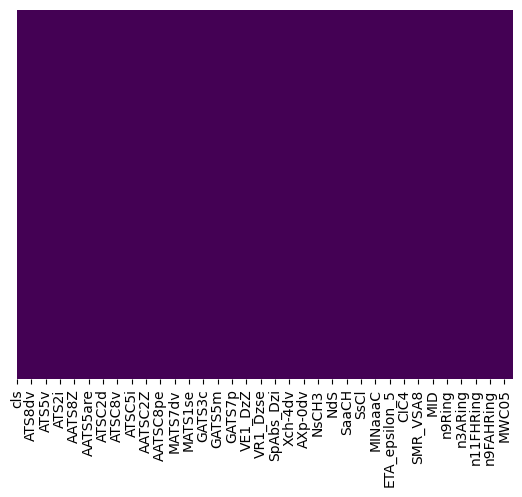

In [ ]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train_data.shape

(2880, 1453)

In [ ]:
X=train_data.drop('cls',axis=1)
y=train_data['cls']

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Define the LinearSVC model
svc_model = LinearSVC(penalty="l1", dual=False)

# Initialize the SelectFromModel object without threshold
selector = SelectFromModel(estimator=svc_model, threshold='median')

# Fit the selector to the data and transform it
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Create the final DataFrame with selected features
X = X[selected_features]

In [ ]:
print(X.shape)

(2880, 726)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_data=pd.read_csv('drive/MyDrive/Colab Notebooks/ic50_test_mordred.csv')

In [ ]:
test_data.shape

(720, 1615)

In [ ]:
X_test=test_data.drop('cls',axis=1)
y_test=test_data['cls']

In [ ]:
common_columns = X_test.columns.intersection(selected_features)

In [ ]:
X_test = X_test[common_columns]

In [ ]:
from sklearn.impute import SimpleImputer
X_test = imputer.transform(X_test)

In [ ]:
print(X_test.shape)

(720, 726)


Random Forest Metrics of Training Set:
AUC: 0.8248
MCC: 0.4949
Sensitivity: 0.7688
Specificity: 0.7257
Accuracy: 0.7472
Random Forest Metrics of Test Set:
Test Accuracy: 0.7250
AUC: 0.7925
MCC: 0.4598
Sensitivity: 0.8278
Specificity: 0.6222
------------------------------
XGBoost Metrics of Training Set:
AUC: 0.8910
MCC: 0.5990
Sensitivity: 0.8292
Specificity: 0.7688
Accuracy: 0.7990
XGBoost Metrics of Test Set:
Test Accuracy: 0.7542
AUC: 0.8529
MCC: 0.5421
Sensitivity: 0.9278
Specificity: 0.5806
------------------------------
GB Metrics of Training Set:
AUC: 0.8600
MCC: 0.5329
Sensitivity: 0.7958
Specificity: 0.7361
Accuracy: 0.7660
GB Metrics of Test Set:
Test Accuracy: 0.7431
AUC: 0.8155
MCC: 0.5082
Sensitivity: 0.8889
Specificity: 0.5972
------------------------------
ET Metrics of Training Set:
AUC: 0.8373
MCC: 0.5008
Sensitivity: 0.7882
Specificity: 0.7111
Accuracy: 0.7497
ET Metrics of Test Set:
Test Accuracy: 0.7236
AUC: 0.8091
MCC: 0.4701
Sensitivity: 0.8778
Specificity: 0.5694

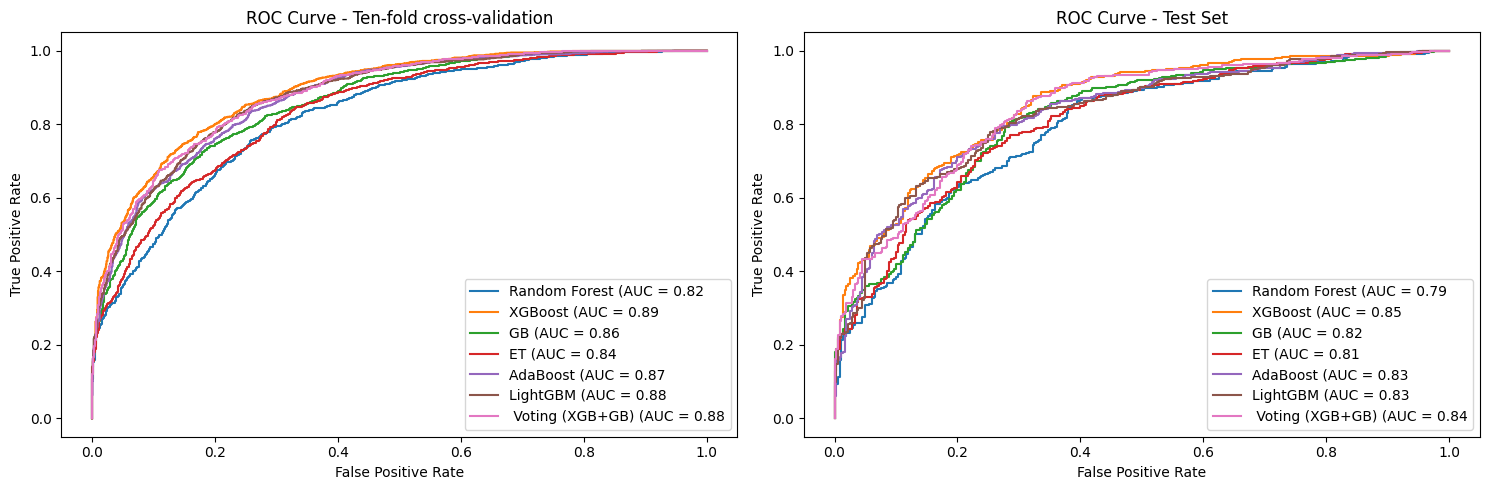

In [ ]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Create a dictionary of models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=500, max_features='log2', random_state=42,
                                             max_depth=5, min_samples_split=3, min_samples_leaf=2, bootstrap=True),
    'XGBoost': xgb.XGBClassifier(learning_rate=0.08, max_depth=3, subsample=0.7, colsample_bytree=0.6,
                                  reg_lambda=0.3, n_estimators=100),
    'GB': GradientBoostingClassifier(n_estimators=400, learning_rate=0.01,min_samples_split=5,min_samples_leaf=4,max_depth=3,subsample=0.8,max_features='sqrt',  loss='log_loss',random_state=42),
    'ET': ExtraTreesClassifier(n_estimators=500, criterion='gini', max_features='sqrt', max_depth=6,
                               random_state=42, min_samples_split=2, bootstrap=False, verbose=0),
    'AdaBoost': AdaBoostClassifier(n_estimators=400, learning_rate=1.0, algorithm='SAMME', random_state=42,
                                   estimator=None),
    'LightGBM': lgb.LGBMClassifier(n_estimator=100,max_depth=7,learning_rate=0.01),
}

# Add XGBoost and GB to the Voting Classifier
voting_clf = VotingClassifier(estimators=[('XGBoost', models['XGBoost']), ('GB', models['GB'])], voting='soft')

# Add the Voting Classifier to the models dictionary
models[' Voting (XGB+GB)'] = voting_clf

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Initialize the result dictionaries
train_results = {}
test_results = {}

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X, y)

    # Perform cross-validation and get predicted probabilities for training set
    y_probas_train = cross_val_predict(model, X, y, cv=10, method="predict_proba")[:, 1]

    # Calculate AUC for training set
    fpr_train, tpr_train, _ = roc_curve(y, y_probas_train)
    auc_train = roc_auc_score(y, y_probas_train)

    # Calculate Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y, (y_probas_train > 0.5).astype(int))

    # Calculate Sensitivity and Specificity
    tn, fp, fn, tp = confusion_matrix(y, (y_probas_train > 0.5).astype(int)).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Calculate Accuracy
    accuracy_train = accuracy_score(y, (y_probas_train > 0.5).astype(int))

    train_results[model_name] = {
        'AUC': auc_train,
        'MCC': mcc,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy_train
    }

    # Plot ROC curve for training set
    axs[0].plot(fpr_train, tpr_train, label=f'{model_name} (AUC = {auc_train:.2f}')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('ROC Curve - Ten-fold cross-validation')
    axs[0].legend()

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy for the test set
    accuracy_test = accuracy_score(y_test, y_pred)
    test_results[model_name] = {'Test Accuracy': accuracy_test}

    # Predict on the test set
    y_probas_test = model.predict_proba(X_test)[:, 1]

    # Calculate AUC for the test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_probas_test)
    auc_test = roc_auc_score(y_test, y_probas_test)

    # Calculate Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, (y_probas_test > 0.5).astype(int))

    # Calculate Sensitivity and Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, (y_probas_test > 0.5).astype(int)).ravel()
    sensitivity = tp / (tp + fn)


    # Plot ROC curve for test set
    axs[1].plot(fpr_test, tpr_test, label=f'{model_name} (AUC = {auc_test:.2f}')
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title('ROC Curve - Test Set')
    axs[1].legend()

    test_results[model_name]['AUC'] = auc_test
    test_results[model_name]['MCC'] = mcc
    test_results[model_name]['Sensitivity'] = sensitivity
    test_results[model_name]['Specificity'] = tn / (tn + fp)

    # Print results
    print(f'{model_name} Metrics of Training Set:')
    for metric, value in train_results[model_name].items():
        print(f'{metric}: {value:.4f}')

    print(f'{model_name} Metrics of Test Set:')
    for metric, value in test_results[model_name].items():
        print(f'{metric}: {value:.4f}')

    print('-' * 30)

plt.tight_layout()
plt.show()

Hybrid

In [ ]:
train_data=pd.read_csv('drive/MyDrive/Colab Notebooks/train_hybrid.csv')

In [ ]:
train_data.shape

(2880, 2496)

In [ ]:
train_data.dtypes.value_counts()

float64    1275
int64      1220
object        1
dtype: int64

In [ ]:
# Below code gives percentage of null in every column
null_percentage = train_data.isnull().sum()/train_data.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>60].keys()

train_data = train_data.drop(col_to_drop, axis=1)

In [ ]:
train_data.shape

(2880, 2335)

In [ ]:
train_data.isna().sum().sort_values(ascending=False).head(10)

MINsssN    1617
MAXsssN    1617
MDEO-12    1400
MDEO-11    1339
MAXaaaC    1326
MINaaaC    1326
MDEN-23    1287
MDEC-11    1281
MINssO     1212
MAXssO     1212
dtype: int64

In [ ]:
# get the columns with null values
null_cols = train_data.columns[train_data.isnull().any()]

# get the count of each data type for columns with null values
dtype_counts = train_data[null_cols].dtypes.value_counts()
dtype_counts

float64    455
dtype: int64

In [ ]:
# get the mean of the columns with float data type
mean_values = train_data.select_dtypes(include=['float']).mean()

# replace missing values with mean for float columns
train_data[train_data.select_dtypes(include=['float']).columns] = train_data.select_dtypes(include=['float']).fillna(mean_values)

In [ ]:
train_data=train_data.drop('Name',axis=1)

In [ ]:
train_data.shape

(2880, 2334)

In [ ]:
X=train_data.drop('cls',axis=1)
y=train_data['cls']

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Define the LinearSVC model
svc_model = LinearSVC(penalty="l1", dual=False)

# Initialize the SelectFromModel object without threshold
selector = SelectFromModel(estimator=svc_model, threshold='median')

# Fit the selector to the data and transform it
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Create the final DataFrame with selected features
X = X[selected_features]

In [ ]:
print(X.shape)

(2880, 1167)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_data=pd.read_csv('drive/MyDrive/Colab Notebooks/test_hybrid.csv')

In [ ]:
test_data.shape

(720, 2496)

In [ ]:
X_test=test_data.drop('cls',axis=1)
y_test=test_data['cls']

In [ ]:
common_columns = X_test.columns.intersection(selected_features)

In [ ]:
X_test = X_test[common_columns]

In [ ]:
from sklearn.impute import SimpleImputer
X_test = imputer.transform(X_test)

In [ ]:
print(X_test.shape)

(720, 1167)


Random Forest Metrics of Training Set:
AUC: 0.8218
MCC: 0.4842
Sensitivity: 0.7556
Specificity: 0.7285
Accuracy: 0.7420
Random Forest Metrics of Test Set:
Test Accuracy: 0.7111
AUC: 0.7863
MCC: 0.4309
Sensitivity: 0.8111
Specificity: 0.6111
------------------------------
XGBoost Metrics of Training Set:
AUC: 0.9080
MCC: 0.6414
Sensitivity: 0.8382
Specificity: 0.8028
Accuracy: 0.8205
XGBoost Metrics of Test Set:
Test Accuracy: 0.7611
AUC: 0.8830
MCC: 0.5539
Sensitivity: 0.9278
Specificity: 0.5944
------------------------------
GB Metrics of Training Set:
AUC: 0.8591
MCC: 0.5366
Sensitivity: 0.8007
Specificity: 0.7347
Accuracy: 0.7677
GB Metrics of Test Set:
Test Accuracy: 0.7375
AUC: 0.8138
MCC: 0.4949
Sensitivity: 0.8778
Specificity: 0.5972
------------------------------
ET Metrics of Training Set:
AUC: 0.8595
MCC: 0.5153
Sensitivity: 0.7937
Specificity: 0.7201
Accuracy: 0.7569
ET Metrics of Test Set:
Test Accuracy: 0.6944
AUC: 0.8182
MCC: 0.4092
Sensitivity: 0.8500
Specificity: 0.5389

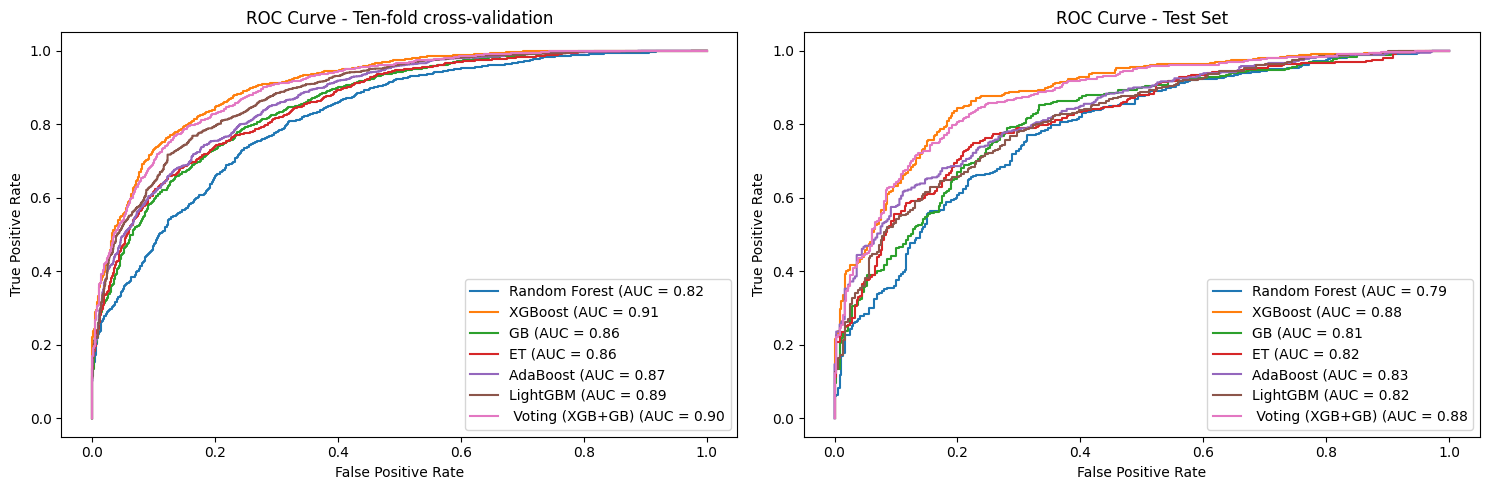

In [ ]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


# Create a dictionary of models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=500, max_features='log2', random_state=42,
                                             max_depth=5, min_samples_split=3, min_samples_leaf=2, bootstrap=True),
    'XGBoost': xgb.XGBClassifier(learning_rate=0.1, max_depth=3,subsample=0.7,colsample_bytree=0.6, reg_lambda=0.5, n_estimators=300),
    'GB': GradientBoostingClassifier(n_estimators=400, learning_rate=0.01,min_samples_split=5,min_samples_leaf=4,max_depth=3,subsample=0.8,max_features='sqrt',  loss='log_loss',random_state=42),
    'ET': ExtraTreesClassifier(n_estimators=500, criterion='gini', max_features='sqrt', max_depth=6,
                               random_state=42, min_samples_split=2, bootstrap=False, verbose=0),
    'AdaBoost': AdaBoostClassifier(n_estimators=300, learning_rate=1.0, algorithm='SAMME', random_state=42,
                                   estimator=None),
    'LightGBM': lgb.LGBMClassifier(max_depth=7,learning_rate=0.01,num_leaves=50),
}

# Add XGBoost and GB to the Voting Classifier
voting_clf = VotingClassifier(estimators=[('XGBoost', models['XGBoost']), ('GB', models['GB'])], voting='soft')

# Add the Voting Classifier to the models dictionary
models[' Voting (XGB+GB)'] = voting_clf

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Initialize the result dictionaries
train_results = {}
test_results = {}

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X, y)

    # Perform cross-validation and get predicted probabilities for training set
    y_probas_train = cross_val_predict(model, X, y, cv=10, method="predict_proba")[:, 1]

    # Calculate AUC for training set
    fpr_train, tpr_train, _ = roc_curve(y, y_probas_train)
    auc_train = roc_auc_score(y, y_probas_train)

    # Calculate Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y, (y_probas_train > 0.5).astype(int))

    # Calculate Sensitivity and Specificity
    tn, fp, fn, tp = confusion_matrix(y, (y_probas_train > 0.5).astype(int)).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Calculate Accuracy
    accuracy_train = accuracy_score(y, (y_probas_train > 0.5).astype(int))

    train_results[model_name] = {
        'AUC': auc_train,
        'MCC': mcc,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy_train
    }

    # Plot ROC curve for training set
    axs[0].plot(fpr_train, tpr_train, label=f'{model_name} (AUC = {auc_train:.2f}')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('ROC Curve - Ten-fold cross-validation')
    axs[0].legend()

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy for the test set
    accuracy_test = accuracy_score(y_test, y_pred)
    test_results[model_name] = {'Test Accuracy': accuracy_test}

    # Predict on the test set
    y_probas_test = model.predict_proba(X_test)[:, 1]

    # Calculate AUC for the test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_probas_test)
    auc_test = roc_auc_score(y_test, y_probas_test)

    # Calculate Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, (y_probas_test > 0.5).astype(int))

    # Calculate Sensitivity and Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, (y_probas_test > 0.5).astype(int)).ravel()
    sensitivity = tp / (tp + fn)


    # Plot ROC curve for test set
    axs[1].plot(fpr_test, tpr_test, label=f'{model_name} (AUC = {auc_test:.2f}')
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title('ROC Curve - Test Set')
    axs[1].legend()

    test_results[model_name]['AUC'] = auc_test
    test_results[model_name]['MCC'] = mcc
    test_results[model_name]['Sensitivity'] = sensitivity
    test_results[model_name]['Specificity'] = tn / (tn + fp)

    # Print results
    print(f'{model_name} Metrics of Training Set:')
    for metric, value in train_results[model_name].items():
        print(f'{metric}: {value:.4f}')

    print(f'{model_name} Metrics of Test Set:')
    for metric, value in test_results[model_name].items():
        print(f'{metric}: {value:.4f}')

    print('-' * 30)

plt.tight_layout()
plt.show()